# Setup
```
$ mkvirtualenv aws_name_similarity
$ pip install --upgrade pip
$ pip install jellyfish jupyter scipy matplotlib
$ jupyter notebook
```

In [46]:
from itertools import combinations
import jellyfish
from scipy.cluster import hierarchy
import numpy as np
import matplotlib.pyplot as plt

 # Testing it out

In [47]:
# Strings to compare
strs = [u"MARTHA", u"MARHTA", u"DWAYNE", u"DUANE", u"DIXON", u"DICKSONX"]

In [48]:
# Calculating Jaro similarity and converting to distance (use Jaro-Winkler below)
jaro_dists = [1 - jellyfish.jaro_distance(x,y) for x,y in combinations(strs, 2)]

In [49]:
jaro_dists

[0.05555555555555547,
 0.5555555555555556,
 0.5444444444444445,
 1.0,
 1.0,
 0.5555555555555556,
 0.5444444444444445,
 1.0,
 1.0,
 0.1777777777777777,
 0.42222222222222217,
 0.4722222222222222,
 0.4,
 0.45000000000000007,
 0.2333333333333334]

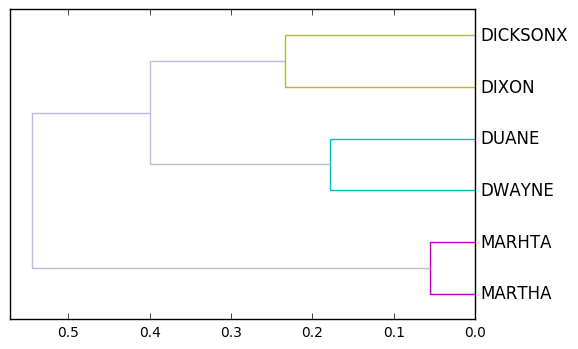

In [50]:
# Plot it
ytdist = np.array(jaro_dists)
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
dn = hierarchy.dendrogram(Z, above_threshold_color='#bcbddc', orientation='left', labels=strs)
hierarchy.set_link_color_palette(None) # reset to default after use
plt.show()

# With real AWS service names

In [63]:
# I copied these from the AWS console. If anyone knows the AWS API endpoint to get an equivalent list, let me know!
strs = [
    u"API Gateway",
    u"Application Discovery Service",
    u"AppStream",
    u"AppStream 2.0",
    u"Athena",
    u"AWS IoT",
    u"Certificate Manager",
    u"CloudFormation",
    u"CloudFront",
    u"CloudSearch",
    u"CloudTrail",
    u"CloudWatch",
    u"CodeBuild",
    u"CodeCommit",
    u"CodeDeploy",
    u"CodePipeline",
    u"Cognito",
    u"Compliance Reports",
    u"Config",
    u"Data Pipeline",
    u"Device Farm",
    u"Direct Connect",
    u"Directory Service",
    u"DMS",
    u"DynamoDB",
    u"EC2",
    u"EC2 Container Service",
    u"Elastic Beanstalk",
    u"Elastic File System",
    u"Elastic Transcoder",
    u"ElastiCache",
    u"Elasticsearch Service",
    u"EMR",
    u"GameLift",
    u"Glacier",
    u"IAM",
    u"Inspector",
    u"Kinesis",
    u"Lambda",
    u"Lex",
    u"Lightsail",
    u"Machine Learning",
    u"Managed Services",
    u"Mobile Analytics",
    u"Mobile Hub",
    u"OpsWorks",
    u"Pinpoint",
    u"Polly",
    u"QuickSight",
    u"RDS",
    u"Redshift",
    u"Rekognition",
    u"Route 53",
    u"S3",
    u"Server Migration",
    u"Service Catalog",
    u"SES",
    u"Snowball",
    u"SNS",
    u"SQS",
    u"Step Functions",
    u"Storage Gateway",
    u"SWF",
    u"Trusted Advisor",
    u"VPC",
    u"WAF & Shield",
    u"WorkDocs",
    u"WorkMail",
    u"WorkSpaces"
]

In [64]:
# Calculate similarity and convert to distance
jaro_dists = [1 - jellyfish.jaro_winkler(x,y) for x,y in combinations(strs, 2)]

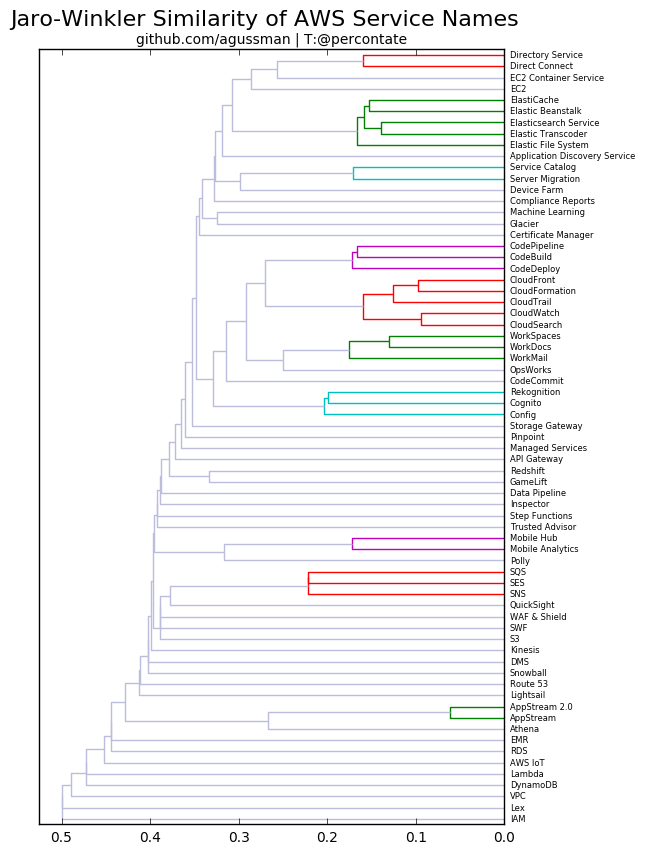

In [80]:
ytdist = np.array(jaro_dists)
Z = hierarchy.linkage(ytdist, 'single')
plt.figure(figsize=(6, 10), facecolor='white')
# The colors don't mean anything; anything below the color_threshold uses one of these colors
plt.suptitle('Jaro-Winkler Similarity of AWS Service Names', y=.94, fontsize=16)
plt.title('github.com/agussman | T:@percontate', fontsize=10)
hierarchy.set_link_color_palette(['g', 'r', 'm', 'c'])
dn = hierarchy.dendrogram(Z, color_threshold=0.25, above_threshold_color='#bcbddc', orientation='left', labels=strs)
hierarchy.set_link_color_palette(None) # reset to default after use
plt.show()

# References
* https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
* https://en.wikipedia.org/wiki/Jaro%E2%80%93Winkler_distance#Example
* https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html